In [82]:
from create_word_img import *

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
font_paths = [

    "danstevis.otf",
    # "345a5dddcff7f1cbb08d964cc275cb50ce7041241011931.ttf",
    # "B Moj_YasDL.com.ttf",
    # "Iranian Sans.ttf",
    # "B Koodak Bold_0.ttf",
    # "Mj_Meem Medium.ttf",
    # "2 Hamid_YasDL.com.ttf"

]


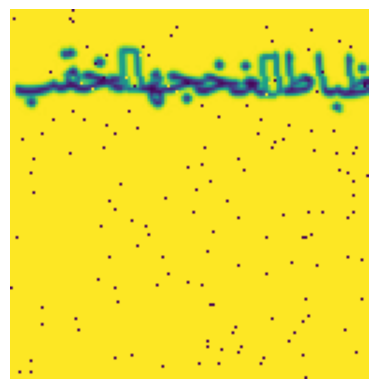

In [84]:
word = random_persian_word()
font = random.choice(font_paths)
img  = render_text_image(word, font)
img  = apply_perspective(img)
img  = random_distort(img)
# img  = blend_background(img)
img  = finalize(img)
arr  = np.array(img, dtype=np.uint8)
plt.imshow(img)
plt.axis('off')
plt.show()


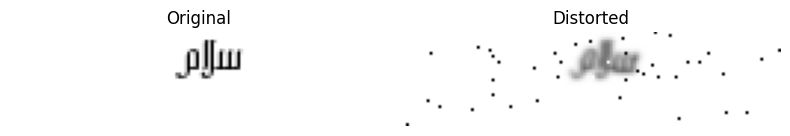

In [61]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 32
FONT_PATH = "Mj_Meem Medium.ttf"  # Adjust as needed

# Updated render_text_image
def render_text_image(text, font_path):
    img = Image.new("RGB", (IMAGE_WIDTH, IMAGE_HEIGHT), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    font_size = random.randint(10, 20)
    font = ImageFont.truetype(font_path, font_size)
    mask = font.getmask(text)
    w, h = mask.size
    x = (IMAGE_WIDTH - w) // 2 + random.randint(-5, 5)
    y =  random.randint(-3, 3)
    draw.text((x, y), text, font=font, fill=(0, 0, 0))
    return img.convert("L")

# Updated random_distort that handles grayscale
def random_distort(image):
    # If grayscale, convert to RGB for distort operations
    orig_mode = image.mode
    img = image.convert("RGB")
    
    # Random rotation
    angle = random.uniform(-5, 5)
    img = img.rotate(angle, expand=False, fillcolor=(255, 255, 255))
    # Random shear
    width, height = img.size
    m = np.tan(random.uniform(-0.1, 0.1))
    xshift = abs(m) * height
    new_width = width + int(round(xshift))
    img = img.transform(
        (new_width, height),
        Image.AFFINE,
        (1, m, -xshift if m > 0 else 0, 0, 1, 0),
        fillcolor=(255, 255, 255),
    )
    img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT), Image.BILINEAR)
    # Gaussian blur
    if random.random() < 0.5:
        img = img.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.0, 1.0)))
    # Convert back to grayscale if necessary
    img = img.convert("L")
    # Add salt-and-pepper noise
    arr = np.array(img, dtype=np.uint8)
    mask_sp = np.random.choice((0,1,2), size=arr.shape, p=[0.98,0.01,0.01])
    arr = np.where(mask_sp==1, 255, arr)
    arr = np.where(mask_sp==2, 0, arr)
    return Image.fromarray(arr)

# Generate example
text = "سلام"
original = render_text_image(text, FONT_PATH)
distorted = random_distort(original)

# Display side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(original, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(distorted, cmap="gray")
axes[1].set_title("Distorted")
axes[1].axis("off")

plt.tight_layout()
plt.show()


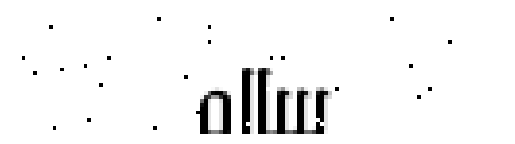

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
from create_word_img import render_text_image  # یا همان اسکریپت شما

# متن نمونه و مسیر فونت
text = "سلام"
font_path = "Mj_Meem Medium.ttf"  # یا مسیر کامل

# تولید تصویر
img = render_text_image(text, font_path)

# نمایش با matplotlib
plt.imshow(img.convert("L"), cmap="gray")
plt.axis("off")
plt.show()


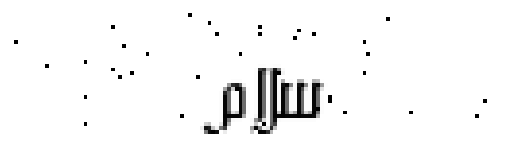

In [2]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
from PIL import ImageFilter

IMAGE_WIDTH = 128
IMAGE_HEIGHT = 32

def render_text_image(text, font_path):
    # ایجاد بوم سفید RGB
    img = Image.new("RGB", (IMAGE_WIDTH, IMAGE_HEIGHT), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    # انتخاب اندازه فونت
    font_size = random.randint(20, 28)
    font = ImageFont.truetype(font_path, font_size)
    
    # محاسبه ابعاد متن با استفاده از getmask
    mask = font.getmask(text)
    w, h = mask.size
    
    # قرار دادن متن در مرکز با کمی جابجایی تصادفی
    x = (IMAGE_WIDTH - w) // 2 + random.randint(-5, 5)
    y = (IMAGE_HEIGHT - h) // 2 + random.randint(-3, 3)
    
    # رسم متن
    draw.text((x, y), text, font=font, fill=(0, 0, 0))
    
    # نمونه‌ای تبدیل به Grayscale و افزودن بلور/نویز
    gray = img.convert("L")
    if random.random() < 0.5:
        gray = gray.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.0, 1.0)))
    arr = np.array(gray, dtype=np.uint8)
    # نویز نمکی-فلفلی
    mask_sp = np.random.choice((0,1,2), size=arr.shape, p=[0.98,0.01,0.01])
    arr = np.where(mask_sp==1, 255, arr)
    arr = np.where(mask_sp==2, 0, arr)
    
    return Image.fromarray(arr)

# تست مجدد
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    img = render_text_image("سلام", "Mj_Meem Medium.ttf")
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()